In [13]:
from hmmlearn import hmm
import pandas as pd
import os
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
import statsmodels.graphics.boxplots as st

In [4]:
def get_sequence(filename, X, lengths, scores):
    file = pd.read_csv(filename)
    for i, row in file.iterrows():
        X.append(list(row[4:]))
        scores.append(list(row[:2]))
    lengths.append(len(file))
    return X, lengths, scores

In [24]:
def analyse(model, X, lengths, scores):
    hidden_state = model.predict(X, lengths)
    index = 0
    for length in lengths:
        print(hidden_state[index:index+length])
        index += length
    comp = []
    for e1, e2 in zip(hidden_state, scores):
        comp.append((e1,e2[0], e2[1]))
    mean_scores0 = []
    mean_scores1 = []
    my_scores0 = [] #look up what is my/their score, forgot which is which
    my_scores1 = [] # no my score is the second -> fixed it
    their_scores0 = []
    their_scores1 = []
    for triple in comp:
        if not math.isnan(triple[1]):
            #print(triple[1])
            if triple[0] == 0:
                mean_scores0.append((triple[1] + triple[2])/2)
                my_scores0.append(triple[2])
                their_scores0.append(triple[1])
            elif triple[0] == 1:
                mean_scores1.append((triple[1] + triple[2])/2)
                my_scores1.append(triple[2])
                their_scores1.append(triple[1])
    data = []
    dataName = []
    for name, liste in [("mean_0", mean_scores0), ("mean_1", mean_scores1),
                         ("my_0", my_scores0), ("my_1", my_scores1),
                         ("their_0", their_scores0), ("their_1", their_scores1)]:
            if liste:
                mean = np.mean(liste)
                median = np.median(liste)
                maxL = np.max(liste)
                minL = np.min(liste)
                #print("mean", mean)
                #print("median", median)
                #print("maxL", maxL)
                #print("minL", minL)
                #print("")
                data.append(liste)
                dataName.append(name)
            else:
                print("Liste is empty", name)
    return data, dataName, comp, mean, median, maxL, minL

In [25]:
#check for models with only 1 state-> eliminate
pm_data = []
pm_names = []
csv_files = ["None", "None", "right hand", "single note","single note", "slower", "slower", "split hands","split hands", "both hands", "both hands"]
pkl_files = ["identity1", "identity2","right hand1", "single note1","single note2", "slower1", "slower2","left hand1","left hand2", "both hands1", "both hands2"]
for csv_file, pkl_file in zip(csv_files, pkl_files):
    lengths = []
    X = []
    scores = []
    for filename in os.listdir(csv_file):
        X, lengths, scores = get_sequence(csv_file + "/" + filename, X, lengths, scores)
    try:
        with open("BestTwoStates/" + pkl_file + ".pkl", "rb") as file:
            model = pickle.load(file)    
        print(pkl_file)
        data, dataName, comp, mean, median, maxL, minL = analyse(model, X, lengths, scores)
        pm_data.append(data)
        pm_names.append(dataName)
        print("score", model.score(X, lengths))
        print("transition prob\n", model.transmat_)
        print("")#print(scores)
    except:
        print("Something went wong")

identity1
[0 1 1]
[0 1 1]
[0 1 1]
[0 1]
[0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 1 1]
[0 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1]
[0 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0]
[0 1 1]
[0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0]
score 2263.3093456441306
transition prob
 [[0.9122807 0.0877193]
 [0.        1.       ]]

identity2
[0 0 0]
[0 0 0]
[0 0 0]
[0 0]
[0 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1]
[0 0 0]
[0 1 1]
[0 1 1]
[0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1]
[0 0 0]
[0 0 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1]
score 3112.7593557628393
transition prob
 [[0.81967213 0.18032787]
 [0.         1.        ]]

right hand1
[0 1 1 1 1 1

In [14]:
#actual analysis with the data (after elimination)
pm_data = []
pm_names = []
csv_files = ["None", "None", "right hand", "single note","single note", "slower", "slower","split hands", "both hands", "both hands"]
pkl_files = ["identity1", "identity2","right hand1", "single note1","single note2", "slower1", "slower2", "left hand2", "both hands1", "both hands2"]
for csv_file, pkl_file in zip(csv_files, pkl_files):
    lengths = []
    X = []
    scores = []
    for filename in os.listdir(csv_file):
        X, lengths, scores = get_sequence(csv_file + "/" + filename, X, lengths, scores)
    try:
        with open("TwoStatesToAnalyse/" + pkl_file + ".pkl", "rb") as file:
            model = pickle.load(file)    
        print(pkl_file)
        data, dataName, comp, mean, median, maxL, minL = analyse(model, X, lengths, scores)
        pm_data.append(data)
        pm_names.append(dataName)
        print("score", model.score(X, lengths))
        print("transition prob\n", model.transmat_)
        print("")#print(scores)
    except:
        print("Something went wong")

identity1
score 2263.3093456441306
transition prob
 [[0.9122807 0.0877193]
 [0.        1.       ]]

identity2
score 3112.7593557628393
transition prob
 [[0.81967213 0.18032787]
 [0.         1.        ]]

right hand1
score 805.6425611529576
transition prob
 [[0.14289181 0.85710819]
 [0.         1.        ]]

single note1
score 2924.5888599184136
transition prob
 [[0.95067437 0.04932563]
 [0.         1.        ]]

single note2
score 6509.056657346261
transition prob
 [[0.85227273 0.14772727]
 [0.         1.        ]]

slower1
score 4965.375171444049
transition prob
 [[0.88495575 0.11504425]
 [0.         1.        ]]

slower2
score 1671.1327167645668
transition prob
 [[0.9318188 0.0681812]
 [0.        1.       ]]

left hand2
score 539.4307276394401
transition prob
 [[0.16681159 0.83318841]
 [0.         1.        ]]

both hands1
score 887.5562371912265
transition prob
 [[0.86111111 0.13888889]
 [0.         1.        ]]

both hands2
score 867.573970945627
transition prob
 [[0.77777808 0.222

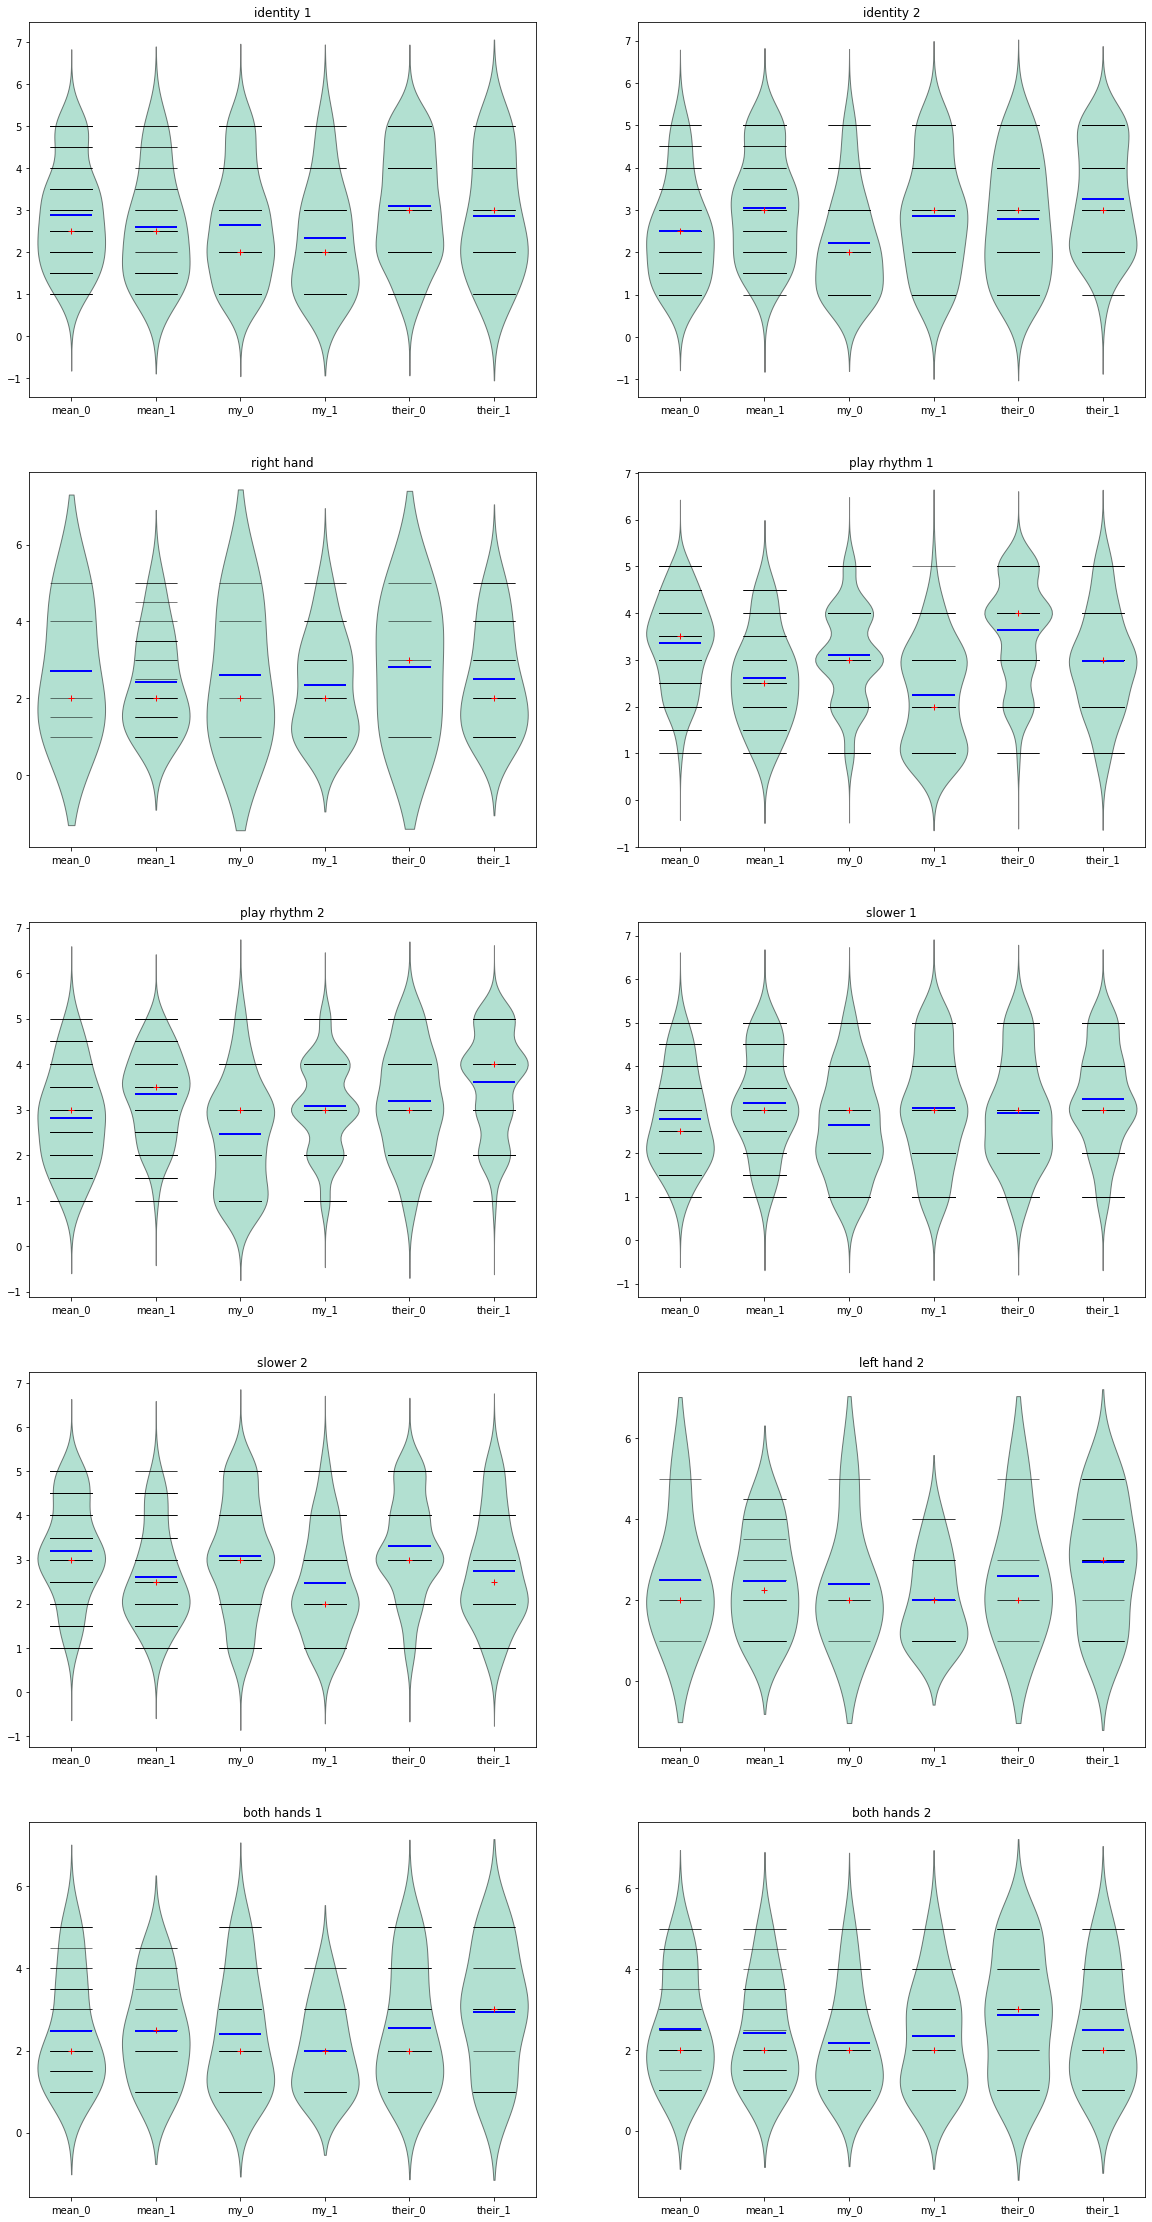

In [17]:
#create bean plots of all TwoStatesToAnalyse
fig, ax = plt.subplots(5,2, figsize=(20,40))

st.beanplot(pm_data[0], ax=ax[0,0])
ax[0,0].set_title("identity 1")
st.beanplot(pm_data[1], ax=ax[0,1])
ax[0,1].set_title("identity 2")
st.beanplot(pm_data[2], ax=ax[1,0])
ax[1,0].set_title("right hand")
st.beanplot(pm_data[3], ax=ax[1,1])
ax[1,1].set_title("play rhythm 1")
st.beanplot(pm_data[4], ax=ax[2,0])
ax[2,0].set_title("play rhythm 2")
st.beanplot(pm_data[5], ax=ax[2,1])
ax[2,1].set_title("slower 1")
st.beanplot(pm_data[6], ax=ax[3,0])
ax[3,0].set_title("slower 2")
st.beanplot(pm_data[7], ax=ax[3,1])
ax[3,1].set_title("left hand 2")
st.beanplot(pm_data[8], ax=ax[4,0])
ax[4,0].set_title("both hands 1")
st.beanplot(pm_data[9], ax=ax[4,1])
ax[4,1].set_title("both hands 2")


ax[0,0].set_xticklabels(pm_names[0])
ax[0,1].set_xticklabels(pm_names[1])
ax[1,0].set_xticklabels(pm_names[2])
ax[1,1].set_xticklabels(pm_names[3])
ax[2,0].set_xticklabels(pm_names[4])
ax[2,1].set_xticklabels(pm_names[5])
ax[3,0].set_xticklabels(pm_names[6])
ax[3,1].set_xticklabels(pm_names[7])
ax[4,0].set_xticklabels(pm_names[8])
ax[4,1].set_xticklabels(pm_names[9])

plt.savefig("BeanplotTwoStates.svg", bbox_inches='tight')
plt.savefig("BeanplotTwoStates.png", bbox_inches='tight')
plt.savefig("BeanplotTwoStates.jpg", bbox_inches='tight')